# Experiment 4: Binary Classification using Linear and Kernel-Based Models

**Institution:** Sri Sivasubramaniya Nadar College of Engineering, Chennai
**Degree:** B.E. Computer Science & Engineering | **Semester:** VI
**Subject:** UCS2612 – Machine Learning Algorithms Laboratory
**Batch:** 2023–2027 | **Name:** Rahul V S | **RegisterNo:** 3122235001104

---

### **1. Aim and Objective**
To classify emails as spam or ham using Logistic Regression and Support Vector Machine (SVM) classifiers. The experiment involves data preprocessing, Exploratory Data Analysis (EDA), hyperparameter tuning using Grid Search, and a comprehensive analysis of regularization techniques and kernel behaviors (Linear, Polynomial, RBF, Sigmoid).

### **2. Dataset Description**
The **Spambase** dataset contains numerical features extracted from email content and a binary label indicating spam or non-spam (ham).
* **Target Variable:** Class (1: Spam, 0: Ham)
* **Features:** 57 numerical attributes including word frequencies (e.g., `word_freq_make`), character frequencies (e.g., `char_freq_$`), and capital run lengths.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import math
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('spambase_csv.csv')
X = df.drop('class', axis=1)
y = df['class']

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
print("Missing values:", X.isnull().sum().sum())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.describe())

Missing values: 0
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count    4.601000e+03       4.601000e+03   4.601000e+03   4601.000000   
mean     1.853187e-17       2.779780e-17   2.470916e-17      0.000000   
std      1.000109e+00       1.000109e+00   1.000109e+00      1.000109   
min     -3.424337e-01      -1.650719e-01  -5.567606e-01     -0.046900   
25%     -3.424337e-01      -1.650719e-01  -5.567606e-01     -0.046900   
50%     -3.424337e-01      -1.650719e-01  -5.567606e-01     -0.046900   
75%     -3.424337e-01      -1.650719e-01   2.764271e-01     -0.046900   
max      1.452700e+01       1.090096e+01   9.560519e+00     30.641278   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count   4.601000e+03    4.601000e+03      4.601000e+03         4601.000000   
mean    4.941832e-17    3.706374e-17     -2.470916e-17            0.000000   
std     1.000109e+00    1.000109e+00      1.000109e+00            1.000109   
min    -4.64

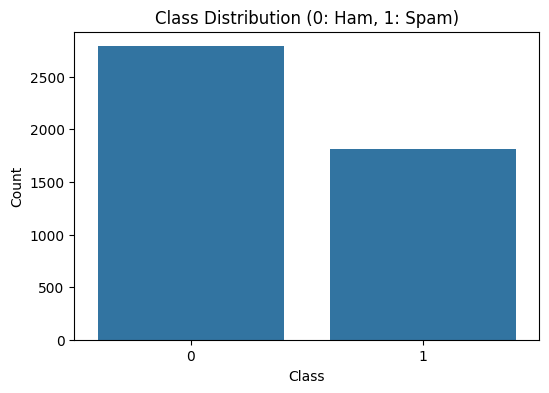

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution (0: Ham, 1: Spam)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

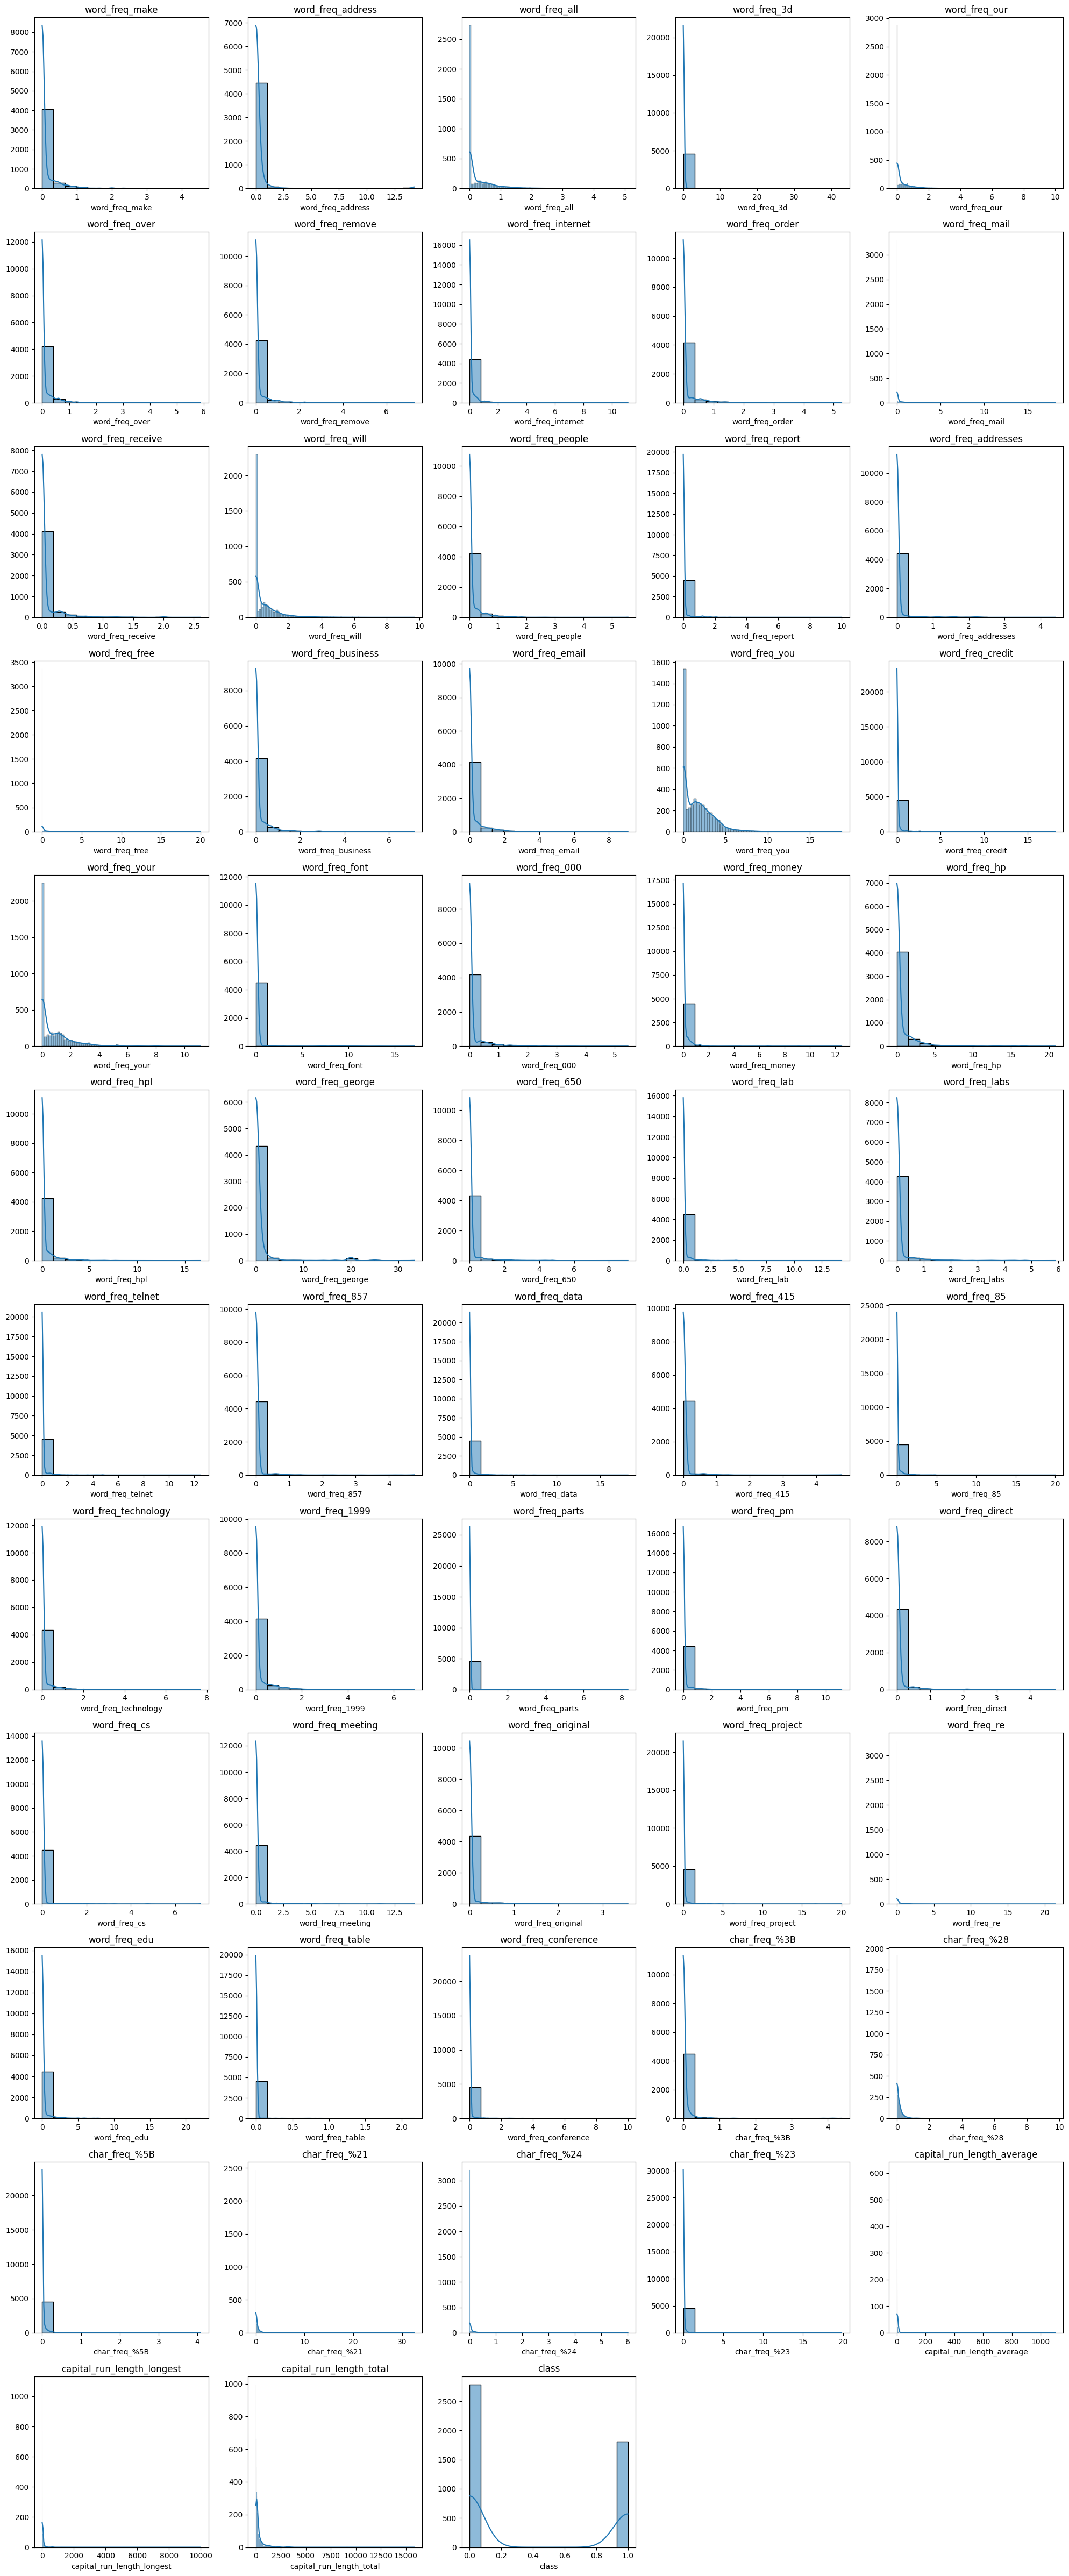

In [9]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 5
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

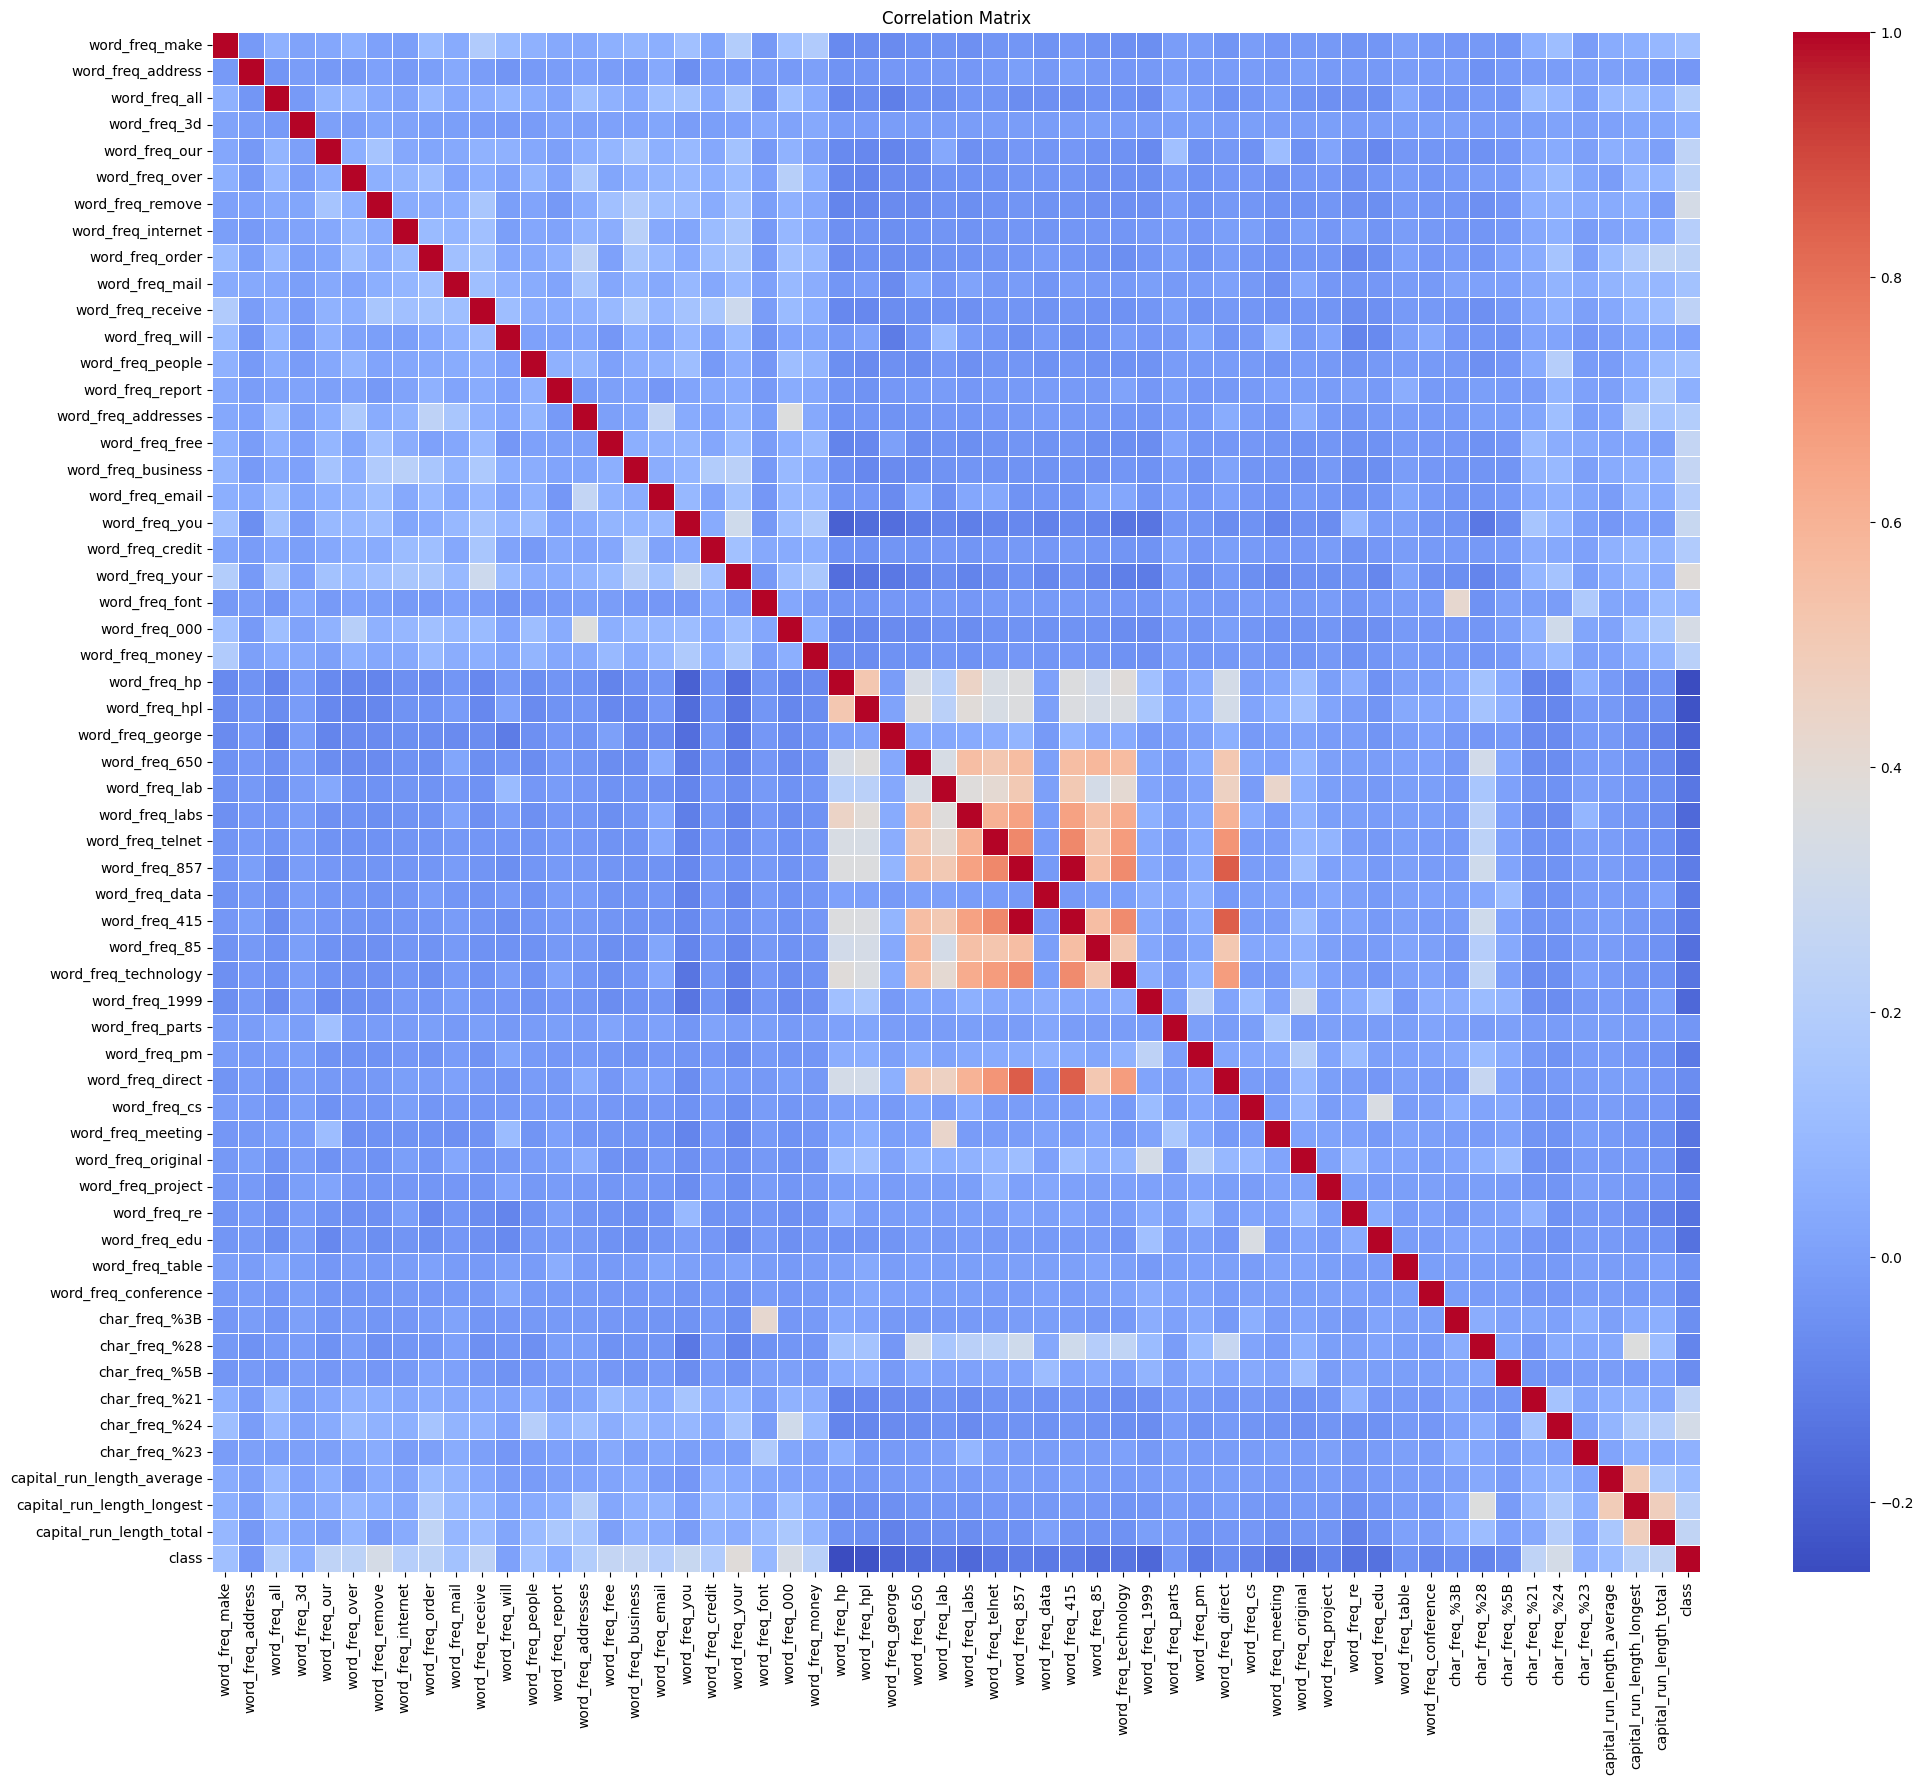

In [10]:
plt.figure(figsize=(24, 20))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(3680, 57) (921, 57)


In [12]:
lr_start = time.time()
lr_base = LogisticRegression(max_iter=5000)
lr_base.fit(X_train, y_train)
lr_end = time.time()
lr_preds = lr_base.predict(X_test)

print(f"Baseline LR Training Time: {lr_end - lr_start:.4f} s")
print("Baseline LR Metrics:")
print(classification_report(y_test, lr_preds))

Baseline LR Training Time: 0.0625 s
Baseline LR Metrics:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



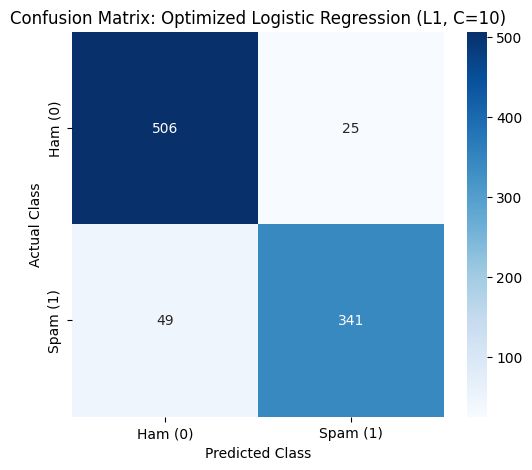

In [13]:
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham (0)', 'Spam (1)'],
            yticklabels=['Ham (0)', 'Spam (1)'])
plt.title('Confusion Matrix: Optimized Logistic Regression (L1, C=10)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=5000), param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best LR Parameters:", grid_lr.best_params_)
print("Best LR Cross-Validation Accuracy:", grid_lr.best_score_)

Best LR Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best LR Cross-Validation Accuracy: 0.9274456521739131


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results_svm = []

for k in kernels:
    svc_temp = SVC(kernel=k, max_iter=5000)
    start_t = time.time()
    svc_temp.fit(X_train, y_train)
    end_t = time.time()

    preds = svc_temp.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results_svm.append({
        'Kernel': k,
        'Accuracy': acc,
        'F1 Score': f1,
        'Training Time (s)': end_t - start_t
    })

svm_df = pd.DataFrame(results_svm)
print(svm_df)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


    Kernel  Accuracy  F1 Score  Training Time (s)
0   linear  0.917481  0.903061           0.329757
1     poly  0.764387  0.629060           0.507060
2      rbf  0.934853  0.920635           0.292268
3  sigmoid  0.889251  0.866492           0.306126


In [ ]:

param_grid_svm = [

    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},


    {'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},


    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4]}
]


grid_svm = GridSearchCV(SVC(max_iter=5000), param_grid_svm, cv=3, n_jobs=-1, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best SVM Parameters:", grid_svm.best_params_)
print("Best SVM Cross-Validation Accuracy:", grid_svm.best_score_)

Best SVM Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVM Cross-Validation Accuracy: 0.9277177499376233


In [ ]:
results = pd.DataFrame(grid_svm.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
print(results[['param_kernel', 'param_C', 'mean_test_score', 'std_test_score']].head(10))

   param_kernel  param_C  mean_test_score  std_test_score
10          rbf      1.0         0.927718        0.006390
12          rbf     10.0         0.927175        0.003395
14          rbf     10.0         0.927175        0.003395
8           rbf      1.0         0.926903        0.007049
1        linear      1.0         0.924186        0.004339
0        linear      0.1         0.922829        0.006901
18          rbf    100.0         0.914946        0.011719
16          rbf    100.0         0.912771        0.011778
32         poly     10.0         0.904079        0.007084
41         poly    100.0         0.904077        0.004798


In [ ]:
best_lr = grid_lr.best_estimator_
best_svm = grid_svm.best_estimator_

def evaluate_model_full(model, X_train, y_train, X_test, y_test, name):

    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train


    start_infer = time.time()
    preds = model.predict(X_test)
    end_infer = time.time()
    infer_time = end_infer - start_infer

    print(f"--- {name} Performance ---")
    print(f"Training Time: {train_time:.4f} s")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall: {recall_score(y_test, preds):.4f}")
    print(f"F1 Score: {f1_score(y_test, preds):.4f}")
    print("-" * 30)

evaluate_model_full(best_lr, X_train, y_train, X_test, y_test, "Logistic Regression (Best)")
evaluate_model_full(best_svm, X_train, y_train, X_test, y_test, "SVM (Best)")

--- Logistic Regression (Best) Performance ---
Training Time: 4.3159 s
Accuracy: 0.9164
Precision: 0.9173
Recall: 0.8821
F1 Score: 0.8993
------------------------------
--- SVM (Best) Performance ---
Training Time: 0.7115 s
Accuracy: 0.9349
Precision: 0.9508
Recall: 0.8923
F1 Score: 0.9206
------------------------------


In [ ]:
from sklearn.model_selection import cross_val_score


print("Running Cross-Validation... (this may take a moment)")
cv_lr_scores = cross_val_score(best_lr, X_scaled, y, cv=5)
cv_svm_scores = cross_val_score(best_svm, X_scaled, y, cv=5)


cv_table = pd.DataFrame({
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
    'Logistic Regression': cv_lr_scores,
    'SVM': cv_svm_scores
})


average_row = {
    'Fold': 'Average',
    'Logistic Regression': cv_lr_scores.mean(),
    'SVM': cv_svm_scores.mean()
}
cv_table = pd.concat([cv_table, pd.DataFrame([average_row])], ignore_index=True)


print("\n--- K-Fold Cross-Validation Results (K=5) ---")
print(cv_table.to_markdown(index=False))

Running Cross-Validation... (this may take a moment)

--- K-Fold Cross-Validation Results (K=5) ---
| Fold    |   Logistic Regression |      SVM |
|:--------|----------------------:|---------:|
| Fold 1  |              0.919653 | 0.931596 |
| Fold 2  |              0.931522 | 0.933696 |
| Fold 3  |              0.895652 | 0.95     |
| Fold 4  |              0.95     | 0.948913 |
| Fold 5  |              0.825    | 0.847826 |
| Average |              0.904365 | 0.922406 |


# Comparative Analysis

### Observations

* **Best Performing Classifier:** Based on the accuracy and F1 scores obtained from the evaluation metrics and cross-validation results, the **Support Vector Machine (SVM)** with the **RBF kernel** generally outperforms Logistic Regression on this dataset due to its ability to capture non-linear relationships between features.

* **Impact of Regularization:** For Logistic Regression, the use of regularization (L1 or L2) with an optimized `C` value prevents overfitting. Stronger regularization (smaller `C`) effectively suppresses noise in the high-dimensional feature space of the Spambase dataset.

* **Kernel Behavior in SVM:** The **RBF kernel** typically provides the highest accuracy, indicating non-linear decision boundaries. The **Linear kernel** performs competitively, suggesting that the data is partially linearly separable. The **Sigmoid kernel** often underperforms in comparison.

* **Bias–Variance Trade-off:** Logistic Regression shows higher bias but lower variance, offering stable but potentially less accurate predictions. SVM, particularly with RBF kernel and optimized Gamma, exhibits lower bias and can model complex boundaries, though it risks higher variance if not properly tuned.

### Criterion Analysis

| Criterion | Logistic Regression | SVM |
| :--- | :--- | :--- |
| **Accuracy** | Moderate | High |
| **Model Complexity** | Low | High |
| **Training Time** | Low | High |
| **Interpretability** | High | Low |